<a href="https://colab.research.google.com/github/lcbjrrr/lcbjrrr/blob/master/R_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%load_ext rpy2.ipython

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%%R
 install.packages("quantmod")
library(quantmod)

 install.packages("TTR")
library(TTR)

 install.packages("PerformanceAnalytics")
library(PerformanceAnalytics)

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'https://cran.rstudio.com/src/contrib/xts_0.12-0.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Content type 'application/x-gzip'
  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 540698 bytes (528 KB)

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: =
  warnings.w

In [0]:
!pip install ttr
!pip install talib

In [0]:
import ttr

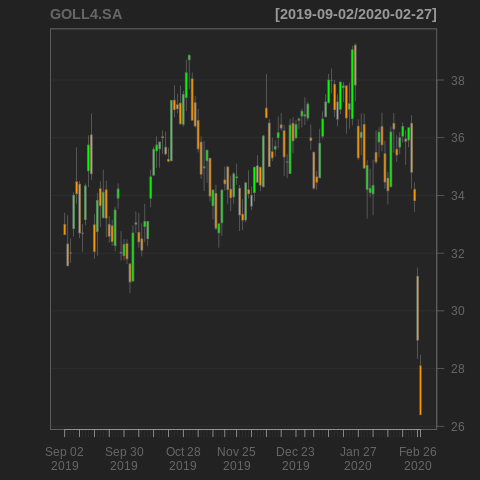

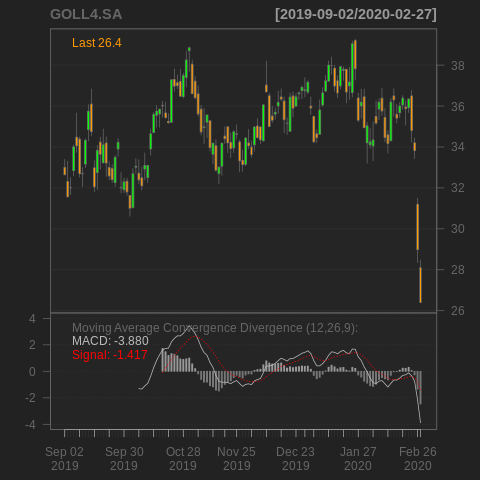

In [0]:
%%R

#Periodo de Analise
startdate <- as.Date("2019-09-1")
enddate <- as.Date("2020-2-28")

#Selecao dos ativos para analise
tickers <- c("GOLL4.SA")

#Captura dos dados
getSymbols(tickers, src = "yahoo", from = startdate, to = enddate)

#Graficos
chartSeries(GOLL4.SA, TA = NULL) #Retirar o volume do grafico
addMACD()
 
 

In [0]:
%%R

PETR4.SA$PETR4.SA.Close

In [0]:
%%R
#Criando a estrategia
macd <- MACD(GOLL4.SA$GOLL4.SA.Close, nFast = 12, nSlow = 26, nSign = 9, maType = SMA, percent = F)
macd


                  macd       signal
2019-09-02          NA           NA
2019-09-03          NA           NA
2019-09-04          NA           NA
2019-09-05          NA           NA
2019-09-06          NA           NA
2019-09-09          NA           NA
2019-09-10          NA           NA
2019-09-11          NA           NA
2019-09-12          NA           NA
2019-09-13          NA           NA
2019-09-16          NA           NA
2019-09-17          NA           NA
2019-09-18          NA           NA
2019-09-19          NA           NA
2019-09-20          NA           NA
2019-09-23          NA           NA
2019-09-24          NA           NA
2019-09-25          NA           NA
2019-09-26          NA           NA
2019-09-27          NA           NA
2019-09-30          NA           NA
2019-10-01          NA           NA
2019-10-02          NA           NA
2019-10-03          NA           NA
2019-10-04          NA           NA
2019-10-07 -0.45249999           NA
2019-10-08 -0.52423080      

In [0]:
%%R
tradeRule <- Lag(ifelse(macd$macd < macd$signal, -1, 1))
tradeRule

           Lag.1
2019-09-02    NA
2019-09-03    NA
2019-09-04    NA
2019-09-05    NA
2019-09-06    NA
2019-09-09    NA
2019-09-10    NA
2019-09-11    NA
2019-09-12    NA
2019-09-13    NA
2019-09-16    NA
2019-09-17    NA
2019-09-18    NA
2019-09-19    NA
2019-09-20    NA
2019-09-23    NA
2019-09-24    NA
2019-09-25    NA
2019-09-26    NA
2019-09-27    NA
2019-09-30    NA
2019-10-01    NA
2019-10-02    NA
2019-10-03    NA
2019-10-04    NA
2019-10-07    NA
2019-10-08    NA
2019-10-09    NA
2019-10-10    NA
2019-10-11    NA
2019-10-14    NA
2019-10-15    NA
2019-10-16    NA
2019-10-17    NA
2019-10-18     1
2019-10-21     1
2019-10-22     1
2019-10-23     1
2019-10-24     1
2019-10-25     1
2019-10-28     1
2019-10-29     1
2019-10-30     1
2019-10-31     1
2019-11-01     1
2019-11-04     1
2019-11-05    -1
2019-11-06    -1
2019-11-07    -1
2019-11-08    -1
2019-11-11    -1
2019-11-12    -1
2019-11-13    -1
2019-11-14    -1
2019-11-18    -1
2019-11-19    -1
2019-11-21    -1
2019-11-22    

In [0]:
%%R
#Calculando os retornos
retornos <- ROC(GOLL4.SA$GOLL4.SA.Close) * tradeRule
retornos <- retornos["2019-10-18/2020-2-28"]
retornos

           GOLL4.SA.Close
2019-10-18  -0.0156778409
2019-10-21  -0.0073633582
2019-10-22   0.0582474817
2019-10-23  -0.0086184210
2019-10-24   0.0008111126
2019-10-25  -0.0141537474
2019-10-28   0.0275767678
2019-10-29   0.0200639788
2019-10-30   0.0153031136
2019-10-31  -0.0596598396
2019-11-01  -0.0054793562
2019-11-04  -0.0219423042
2019-11-05   0.0250226586
2019-11-06  -0.0077441947
2019-11-07  -0.0161545245
2019-11-08   0.0460247744
2019-11-11  -0.0064553628
2019-11-12   0.0396770314
2019-11-13  -0.0048572955
2019-11-14  -0.0348197359
2019-11-18  -0.0061234481
2019-11-19   0.0058309492
2019-11-21   0.0082209213
2019-11-22  -0.0241748200
2019-11-25   0.0028817887
2019-11-26   0.0391399661
2019-11-27   0.0054168355
2019-11-28  -0.0384776687
2019-11-29   0.0110949459
2019-12-02  -0.0127051491
2019-12-03   0.0393579141
2019-12-04  -0.0152674431
2019-12-05  -0.0029070660
2019-12-06   0.0485822851
2019-12-09   0.0173199656
2019-12-10  -0.0471561496
2019-12-11   0.0085348741
2019-12-12  

In [0]:
%%R
#retornos$GOLL4.SA.Close[is.na(retornos$GOLL4.SA.Close)] <- 0


In [0]:

%%R
#Grafico da performance da carteira
carteira <- exp(cumsum(retornos$GOLL4.SA.Close))-1
carteira


           GOLL4.SA.Close
2019-10-18  -0.0155555833
2019-10-21  -0.0227777778
2019-10-22   0.0358333611
2019-10-23   0.0269444722
2019-10-24   0.0277777778
2019-10-25   0.0133333333
2019-10-28   0.0416666667
2019-10-29   0.0627777222
2019-10-30   0.0791666111
2019-10-31   0.0166666111
2019-11-01   0.0111111667
2019-11-04  -0.0108333056
2019-11-05   0.0142305493
2019-11-06   0.0064064851
2019-11-07  -0.0097209171
2019-11-08   0.0369215761
2019-11-11   0.0302494299
2019-11-12   0.0719484451
2019-11-13   0.0667542998
2019-11-14   0.0302494299
2019-11-18   0.0239600270
2019-11-19   0.0299481271
2019-11-21   0.0384501490
2019-11-22   0.0136468195
2019-11-25   0.0165721485
2019-11-26   0.0571496692
2019-11-27   0.0628916126
2019-11-28   0.0227708479
2019-11-29   0.0341816190
2019-12-02   0.0211253042
2019-12-03   0.0621160297
2019-12-04   0.0460233929
2019-12-05   0.0429869496
2019-12-06   0.0949086648
2019-12-09   0.1140376234
2019-12-10   0.0627233002
2019-12-11   0.0718323267
2019-12-12  

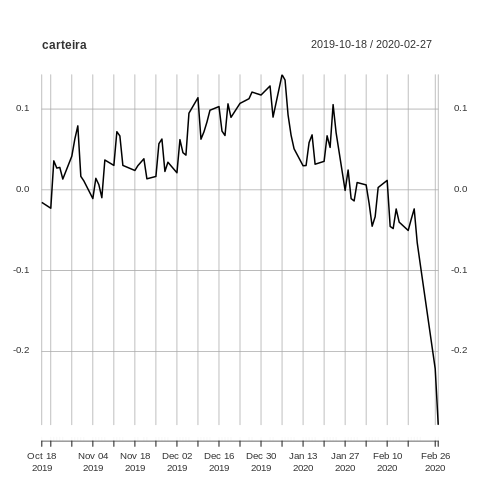

In [0]:
%%R
plot(carteira)



In [0]:
%%R

#Avaliaçao da Carteira

table.Drawdowns(retornos, top = 10)


        From     Trough         To   Depth Length To Trough Recovery
1 2020-01-07 2020-02-27       <NA> -0.3683     37        36       NA
2 2019-10-31 2019-11-04 2019-12-06 -0.0853     25         3       22
3 2019-12-10 2019-12-10 2019-12-27 -0.0472     12         1       11
4 2020-01-03 2020-01-03 2020-01-06 -0.0348      2         1        1
5 2019-10-18 2019-10-21 2019-10-22 -0.0229      3         2        1
6 2019-10-23 2019-10-25 2019-10-28 -0.0219      4         3        1
7 2019-12-30 2019-12-30 2020-01-02 -0.0033      2         1        1


In [0]:
%%R
table.DownsideRisk(retornos)


                              GOLL4.SA.Close
Semi Deviation                        0.0242
Gain Deviation                        0.0157
Loss Deviation                        0.0258
Downside Deviation (MAR=210%)         0.0305
Downside Deviation (Rf=0%)            0.0259
Downside Deviation (0%)               0.0259
Maximum Drawdown                      0.3683
Historical VaR (95%)                 -0.0473
Historical ES (95%)                  -0.0777
Modified VaR (95%)                   -0.0617
Modified ES (95%)                    -0.1115


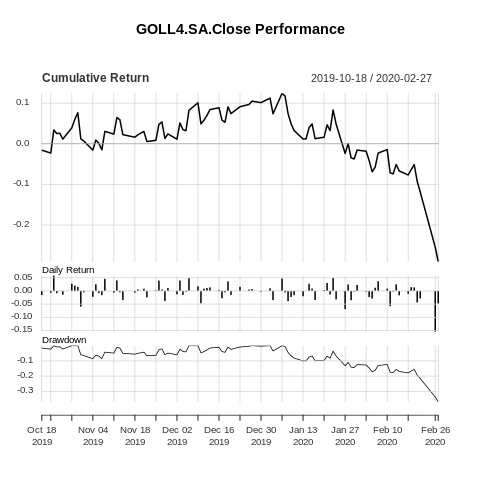

In [0]:
%%R

charts.PerformanceSummary(retornos)

![alt text](https://pbs.twimg.com/media/ER8_mwfXkAETr4H?format=png&name=medium)

In [0]:
 

from IPython.core.display import HTML
HTML('<script>alert("alo")</script>')

In [0]:
from IPython.core.display import display, HTML
display(HTML('<script>alert("alo")</script>'))

In [0]:
from IPython.display import IFrame

IFrame(src='.' , srcdoc='<h1>Hello, world!</h1>', width=700, height=600)